# Introduction to Pandas

In basic Python, we can use dictionaries for data handling, containing data as lists. While these basic structures are convenient for simple data handling, they are suboptimal for advanced data processing and analysis.

For such, we introduce [pandas](https://pandas.pydata.org/), one of the primary tools for handling and analysing tabular data in the Python. Pandas' primary object, the "DataFrame", is a 2-dimensional indexed and labeled data structure with columns of different data types, and is extremely useful in wrangling data.

<img src="pandas-dataframe.png" alt="Pandas DataFrame" width="800"/>

See also:
* [10 Minutes into pandas](https://pandas.pydata.org/docs/user_guide/10min.html)
* [DataFrame - user guide](https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe)
* [DataFrame - API reference](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Creating DataFrames
### DataFrames from dictionaries
Assume we did some measurements and have some results available in a dictionary:

In [2]:
measurements = {
    "label": ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"],
    "value1": [9, 11, 10.2, 9.5, 15,  400, 9, 11, 11.3, 10],
    "value2": [2, np.nan, 8, 5, 7, np.nan, 1, 4, 6, 9],
    "value3": [3.1, 0.4, 5.6, np.nan, 4.4, 2.2, 1.1, 0.9, 3.3, 4.1],
    "valid": [True, False, True, True, False, True, False, True, True, False],
}

This data structure can be easily transferred into a DataFrame which provides additional functionalities, like visualizing it nicely:

In [3]:
df = pd.DataFrame(data=measurements)
df

,label,value1,value2,value3,valid
0,A,9.0,2.0,3.1,True
1,B,11.0,NaN,0.4,False
2,C,10.2,8.0,5.6,True
3,D,9.5,5.0,NaN,True
4,E,15.0,7.0,4.4,False
5,F,400.0,NaN,2.2,True
6,G,9.0,1.0,1.1,False
7,H,11.0,4.0,0.9,True
8,I,11.3,6.0,3.3,True
9,J,10.0,9.0,4.1,False


DataFrames also provide some convenient methods to get an overview of the DataFrames' structure and the containing data:
* [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) to summarize the DataFrame
* [`describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) for descriptive statistics
* [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) for simple plots of DataFrames and Series

In [4]:
# Show structure of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   10 non-null     object 
 1   value1  10 non-null     float64
 2   value2  8 non-null      float64
 3   value3  9 non-null      float64
 4   valid   10 non-null     bool   
dtypes: bool(1), float64(3), object(1)
memory usage: 458.0+ bytes


In [5]:
# Show basic descriptive statistics of the containing data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
value1,10.0,49.600000,123.130184,9.0,9.625,10.6,11.225,400.0
value2,8.0,5.250000,2.815772,1.0,3.500,5.5,7.250,9.0
value3,9.0,2.788889,1.769495,0.4,1.100,3.1,4.100,5.6


In [6]:
# Show descriptive statistics for categorical data
df.describe(exclude=['number']).transpose()

,count,unique,top,freq
label,10,10,A,1
valid,10,2,True,6


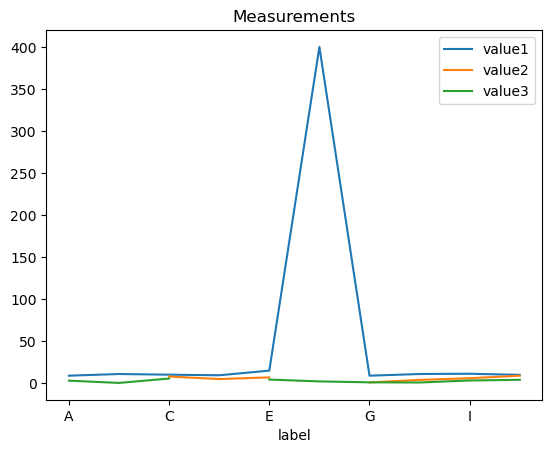

In [7]:
# Plot the data
df.plot(x='label', y=['value1', 'value2', 'value3'], title='Measurements')
plt.show()

## Saving and loading DataFrames
We can save this DataFrames for continuing to work with it. We chose to save it as a CSV file. You should generally always store your data in such an open, compatible format with well-defined specifications, (not necessarily CSV).

In [8]:
df.to_csv('data/measurements_1.csv', index=False)

Stored DataFrames can be read with pandas from various formats, so we are able to read files into a DataFrame again.

See also:
* [Input and Output with pandas](https://pandas.pydata.org/pandas-docs/stable/reference/io.html)

In [9]:
df_new = pd.read_csv('data/measurements_1.csv')
df_new

,label,value1,value2,value3,valid
0,A,9.0,2.0,3.1,True
1,B,11.0,NaN,0.4,False
2,C,10.2,8.0,5.6,True
3,D,9.5,5.0,NaN,True
4,E,15.0,7.0,4.4,False
5,F,400.0,NaN,2.2,True
6,G,9.0,1.0,1.1,False
7,H,11.0,4.0,0.9,True
8,I,11.3,6.0,3.3,True
9,J,10.0,9.0,4.1,False
